In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#to check how may rows and columns does this data set have
customer_data.shape


(200, 5)

In [4]:
#getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#checking missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
D = customer_data.iloc[:,[3,4]].values
D

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
#wcss-within cluster sum of squares
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init='auto')
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)

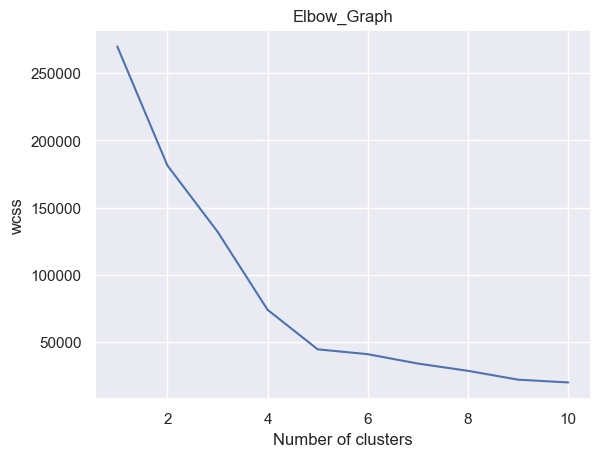

In [8]:
#plot elbowgraph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow_Graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [9]:
#training the model now 
jen = KMeans(n_clusters=5,init='k-means++',random_state=0,n_init='auto')
#returning a label for each data points on the basis of the clusers givem i.e 5
a = jen.fit_predict(D)
print(a)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


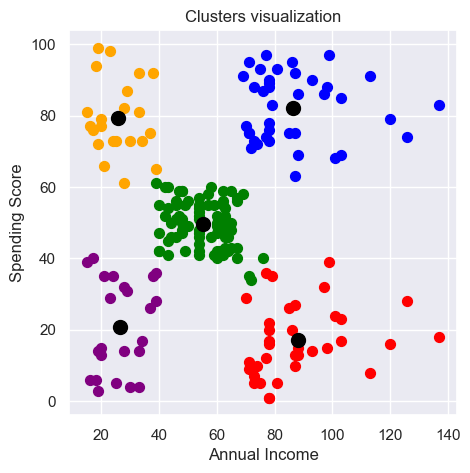

In [10]:
#clusters Visualization with their centroid by plotting
plt.figure(figsize=(5,5))

plt.scatter(D[a==0,0],D[a==0,1],s=50,c='red',label='Cluster1')
plt.scatter(D[a==1,0],D[a==1,1],s=50,c='green',label='Cluster2')
plt.scatter(D[a==2,0],D[a==2,1],s=50,c='blue',label='Cluster3')
plt.scatter(D[a==3,0],D[a==3,1],s=50,c='orange',label='Cluster4')
plt.scatter(D[a==4,0],D[a==4,1],s=50,c='purple',label='Cluster5')

plt.scatter(jen.cluster_centers_[:,0],jen.cluster_centers_[:,1],s=100,c="black",label='Centroids')
plt.title('Clusters visualization')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [16]:

c = np.array([[40,52]])
e=jen.predict(c)
print(e)

[0]


In [17]:
import pickle

In [18]:
pickle.dump(jen,open('clustering.pkl','wb'))

In [19]:
obj = pd.read_pickle(r'clustering.pkl')

In [20]:
obj.cluster_centers_

array([[40., 52.],
       [55., 65.],
       [84., 56.],
       [15., 35.],
       [65., 85.]])

In [21]:
c = np.array([[40,52]])
e=obj.predict(c)

e

array([0])

[3]
